In [ ]:
'''
This notebook is oriented to use an given dataset customized to contains 6 features and training a classification tree
This features are: cqt, rmse, energy, mfccs, chromagram and spectral contrast
This notebook is currently in development phase, so contains a considerably quantity of test code

'''

In [38]:
import tensorflow as tf
import pandas as pd
from pathlib import Path
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np
import gc

# Reading Audio Data


# features = pd.read_csv('Datasets/2000Spoti.csv', encoding='latin-1', thousands=',')

features = pd.read_csv('MI_PRIMER_DATAFRAME.csv', encoding='latin-1', thousands=',')

# features = pd.read_csv('19_MFCCS_DATAFRAME.csv', encoding='latin-1', thousands=',')

print(features.head(5))

print('done')

   Unnamed: 0  Genre     Energy      RMSE      ZCR     MFCCS  \
0           0  Blues  10.130677  0.126542  55032.0  1.938016   
1           1  Blues   5.927915  0.092873  37140.0 -0.055611   
2           2  Blues  17.180486  0.171918  50564.0  1.034164   
3           3  Blues  13.435020  0.137898  22078.0  0.071344   
4           4  Blues   5.467545  0.088730  67226.0 -8.458841   

                                                CQT  Spectral_Contrast  \
0  (-4.7210443976842666e-05-0.0003847373003636522j)          20.526699   
1    (0.0026061119576023034-0.0003092158459368388j)          20.676128   
2    (-0.0022478025439449678-0.003290965346786643j)          22.197517   
3       (0.002346435118550985-0.00108603295010745j)          21.426268   
4  (-0.00011418425521436648+0.0008156369507511931j)          21.466338   

   Chromagram  
0    0.267990  
1    0.254184  
2    0.262335  
3    0.225260  
4    0.262152  
done


In [39]:

#extracting labels and features

labelColumn = 'Genre'

labels = np.array(features[labelColumn])
print(np.unique(labels))

print("The labels of out dataset are:", np.unique(labels))
print("And their shape is:", labels.shape)

featureColumsToDrop = ['Unnamed: 0', 'Genre', 'CQT']

features = features.drop(featureColumsToDrop, 1)

print("The features of out dataset are:")

features.head(5)

['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock']
The labels of out dataset are: ['Blues' 'Classical' 'Country' 'Disco' 'Hiphop' 'Jazz' 'Metal' 'Pop'
 'Reggae' 'Rock']
And their shape is: (1000,)
The features of out dataset are:


,Energy,RMSE,ZCR,MFCCS,Spectral_Contrast,Chromagram
0,10.130677,0.126542,55032.0,1.938016,20.526699,0.267990
1,5.927915,0.092873,37140.0,-0.055611,20.676128,0.254184
2,17.180486,0.171918,50564.0,1.034164,22.197517,0.262335
3,13.435020,0.137898,22078.0,0.071344,21.426268,0.225260
4,5.467545,0.088730,67226.0,-8.458841,21.466338,0.262152


In [40]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.3, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)




Training Features Shape: (700, 6)
Training Labels Shape: (700,)
Testing Features Shape: (300, 6)
Testing Labels Shape: (300,)


In [41]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier

# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, random_state = 42)

# Train the model on training data
rf.fit(train_features, train_labels)




RandomForestClassifier(n_estimators=2000, random_state=42)

In [42]:
print(rf.feature_importances_)

[0.16529358 0.15083916 0.17331748 0.1757426  0.1868145  0.14799269]


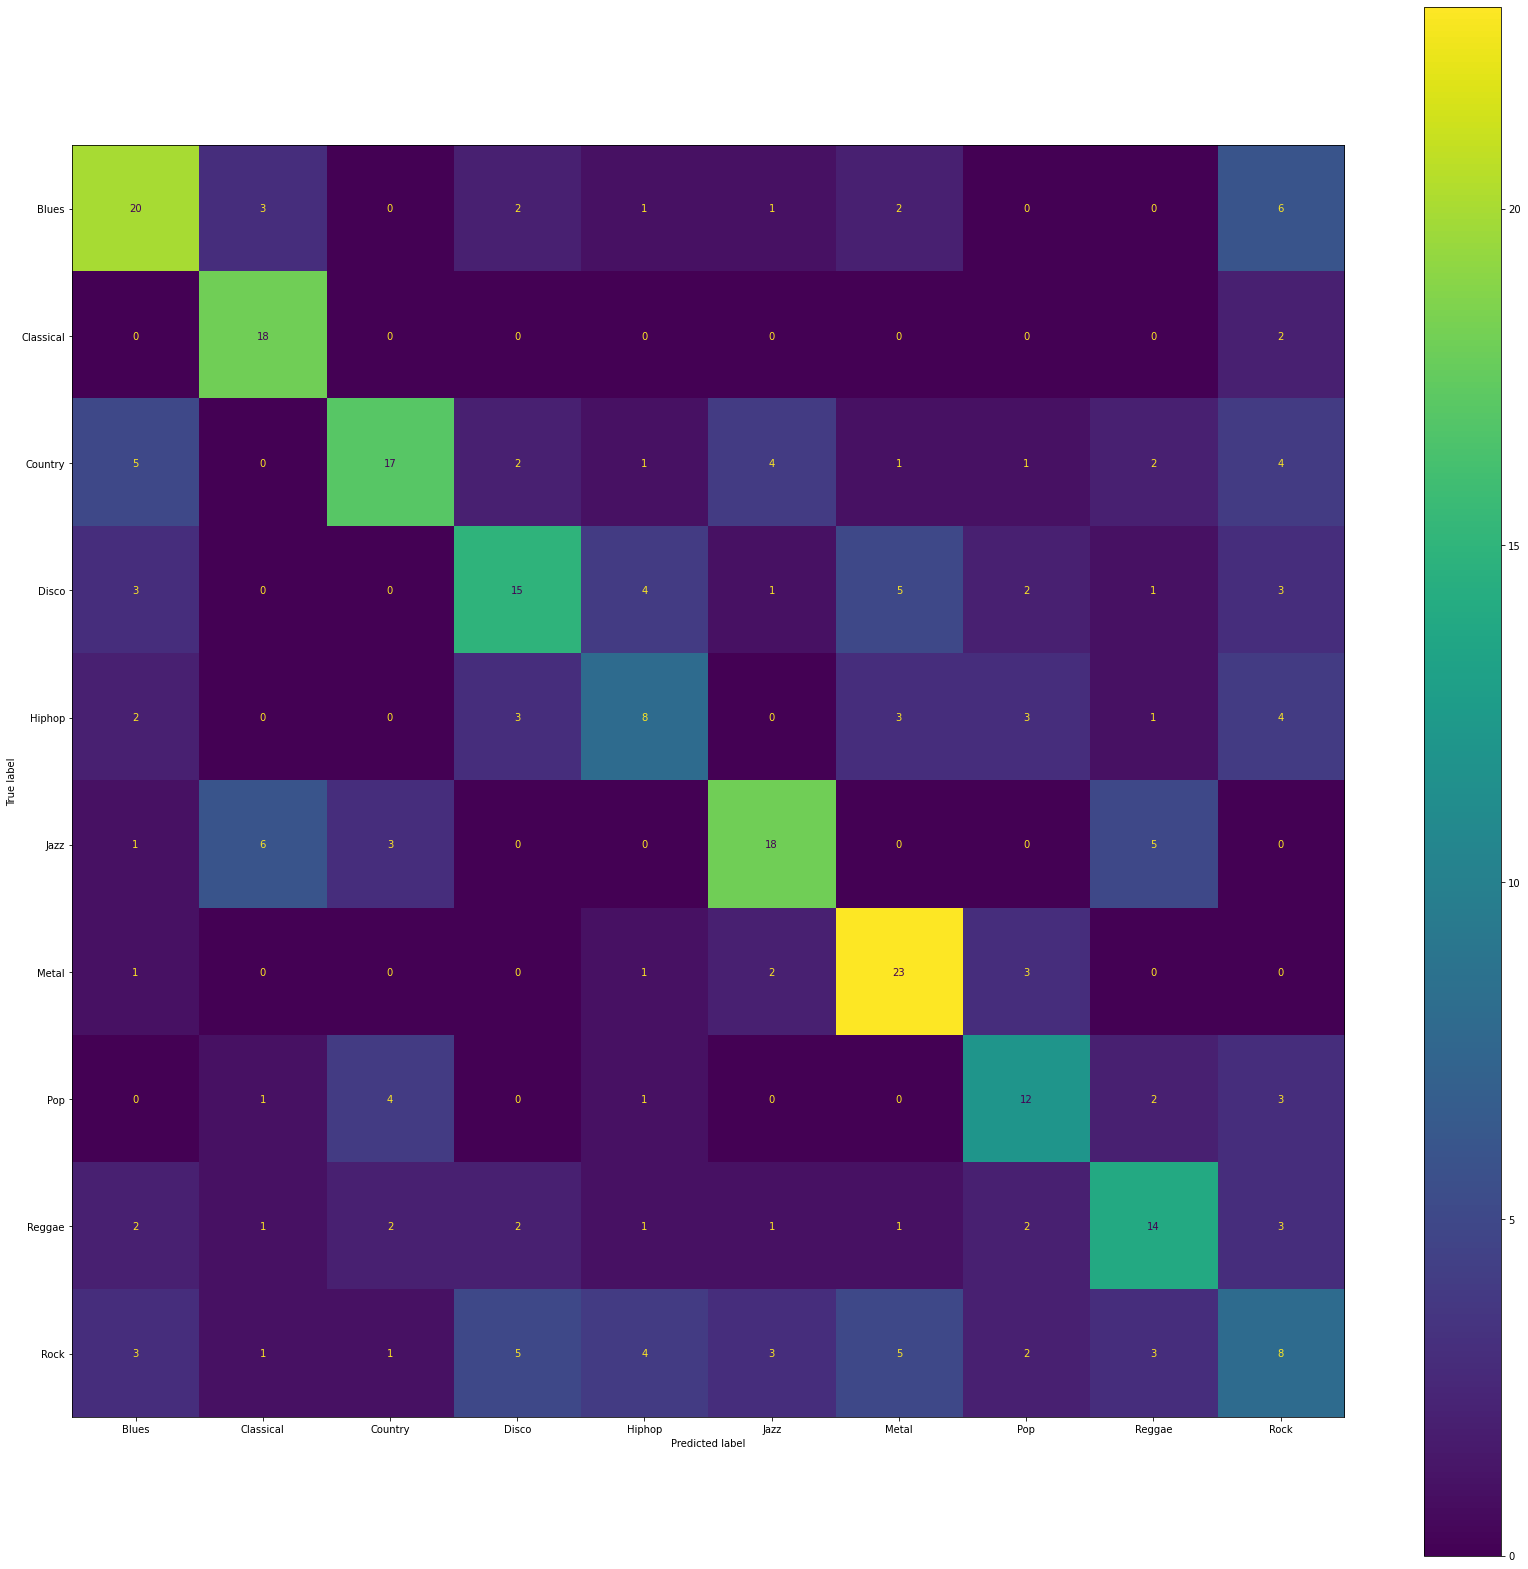

In [43]:
from sklearn.metrics import plot_confusion_matrix
from matplotlib.pyplot import figure


predictions = rf.predict(test_features)

plot_confusion_matrix(rf, test_features, test_labels)
fig = plt.gcf()
fig.set_size_inches(28.5, 28.5)
plt.show()

# import junix;
# junix.export_images(filepath= "ClassificationTree.ipynb")